In [1]:
# to run notebook inside of package
import sys
sys.path.append('/Users/mollyliebeskind/Documents/auto_forecast/auto_forecast')

# standard data manipulation imports
import pandas as pd

# import internal package functions
from src.plotting import *
from src.data_processing import *

# Run the package

In [5]:
value_col = 'sales'
diffed_value_col = f"{value_col}_differenced"
date_col = 'date'
mean_freq = 'Y'
daily_data = pd.read_csv('train.csv')

monthly_data = aggregate_by_time(
    daily_data, 
    date_col, 
    resample_freq='M', 
    aggregate='sum'
    )

monthly_data = difference_data(
    data=monthly_data, 
    date_col=date_col,
    value_col=value_col, 
    diff_value_col_name=diffed_value_col
    )

supervised_data = create_lag_data(monthly_data, date_col, diffed_value_col, 13)


# Visualize EDA

(<Figure size 800x300 with 1 Axes>,
 <Axes: title={'center': 'distrobution of sales per day'}, xlabel='sales per day', ylabel='count'>)

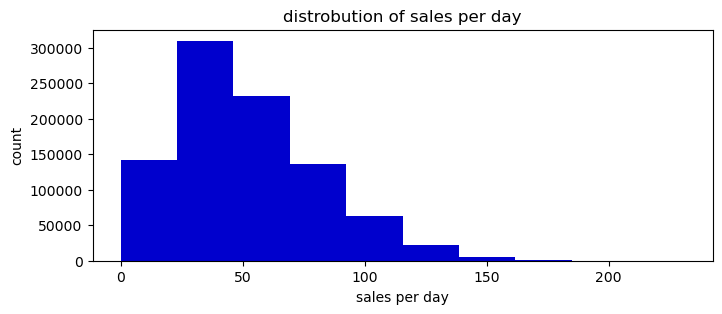

In [3]:
plot_periodic_values_hist(daily_data, value_col)

(<Figure size 800x300 with 1 Axes>,
 <Axes: title={'center': 'sales per group'}, xlabel='group id', ylabel='summed value for the group'>)

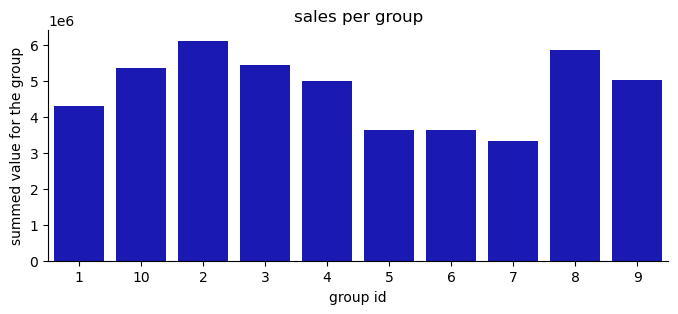

In [4]:
plot_values_per_group(daily_data, value_col, ['store'])

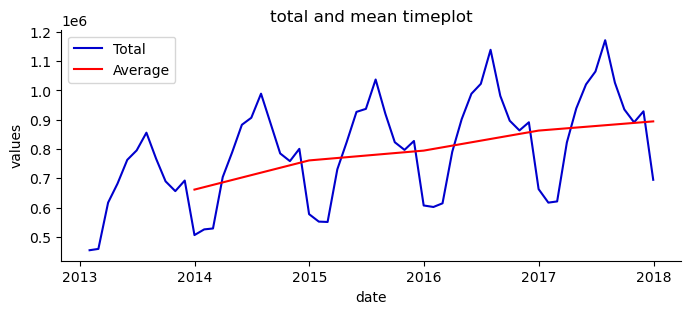

In [5]:
plot_time_series(monthly_data, date_col, value_col, mean_freq)

# Visualize Data Processing

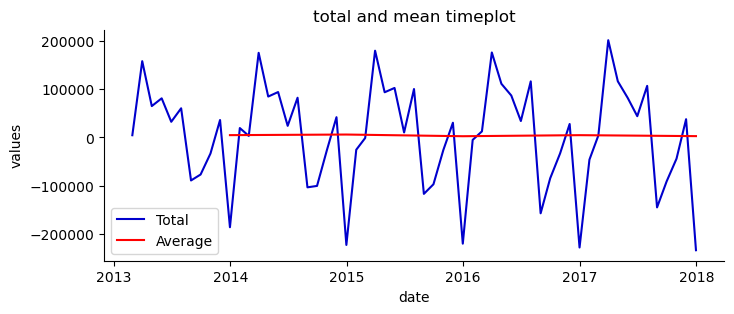

In [5]:
plot_time_series(monthly_data, date_col, diffed_value_col, mean_freq)

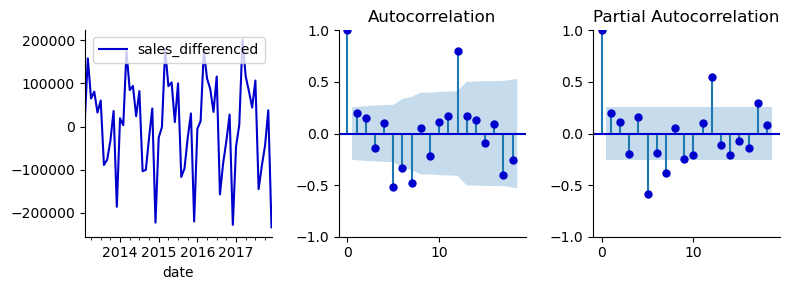

In [6]:
plt_acf_pcf(monthly_data, date_col, diffed_value_col)

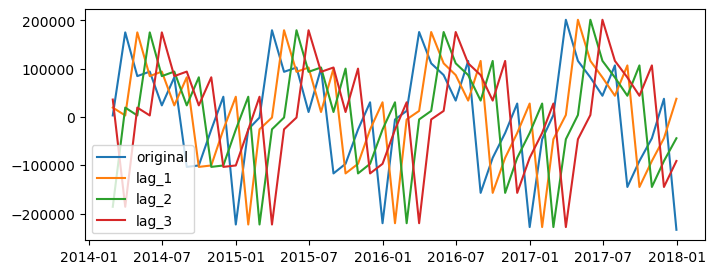

In [18]:

plot_lag_cols(supervised_data, date_col, diffed_value_col, 'lag', num_lags=3)